In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import plotly.express as px


Amerika Birleşik Devletleri'nde halk sağlığını korumak ve hastalık kontrolünü yönetmek amacıyla faaliyet gösteren bir federal ajanstan aldığım API ile Projeyi oluşturdum.

In [38]:

url = "https://data.cdc.gov/resource/n8mc-b4w4.json"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("Veri seti başarıyla çekildi.")
else:
    print("Veri seti çekilirken bir hata oluştu.")



Veri seti başarıyla çekildi.


In [41]:
# Veri setini DataFrame'e dönüştürme
df = pd.DataFrame(data)


In [76]:

if response.status_code == 200:
    data = response.json()
    for row in data[:5]:
        print(row)
else:
    print("Veri seti çekilirken bir hata oluştu.")

{'case_month': '2023-01', 'res_state': 'UT', 'state_fips_code': '49', 'res_county': 'SALT LAKE', 'county_fips_code': '49035', 'age_group': '18 to 49 years', 'sex': 'Female', 'race': 'White', 'ethnicity': 'Non-Hispanic/Latino', 'case_positive_specimen': '0.0', 'case_onset_interval': '0.0', 'process': 'Missing', 'exposure_yn': 'Missing', 'current_status': 'Laboratory-confirmed case', 'symptom_status': 'Symptomatic', 'hosp_yn': 'No', 'icu_yn': 'No', 'death_yn': 'Unknown'}
{'case_month': '2021-01', 'res_state': 'CA', 'state_fips_code': '06', 'res_county': 'RIVERSIDE', 'county_fips_code': '06065', 'age_group': '50 to 64 years', 'sex': 'Female', 'race': 'NA', 'ethnicity': 'NA', 'process': 'Missing', 'exposure_yn': 'Missing', 'current_status': 'Laboratory-confirmed case', 'symptom_status': 'Unknown', 'hosp_yn': 'Missing', 'icu_yn': 'Missing', 'death_yn': 'Missing'}
{'case_month': '2022-10', 'res_state': 'MI', 'state_fips_code': '26', 'res_county': 'OAKLAND', 'county_fips_code': '26125', 'age_

In [47]:
null_columns = df.columns[df.isnull().any()]
print("Eksik değer içeren sütunlar:\n", null_columns)

Eksik değer içeren sütunlar:
 Index(['case_positive_specimen', 'case_onset_interval',
       'underlying_conditions_yn'],
      dtype='object')


In [52]:
# eksik değerleri en yakın değerle doldur
df['case_positive_specimen'] = df['case_positive_specimen'].fillna(method='ffill')


KATEGORİK VERİ VAR MI İNCELEMEK İÇİN


In [53]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kategorik sütunlar:\n", categorical_columns)

Kategorik sütunlar:
 Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen', 'process', 'exposure_yn', 'current_status',
       'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn',
       'case_onset_interval', 'underlying_conditions_yn'],
      dtype='object')


In [54]:
import random

# 'res_state' sütunu için simülasyon
state_values = df['res_state'].unique()
simulated_states = random.choices(state_values, k=len(df))
df['simulated_state'] = simulated_states

# 'age_group' sütunu için simülasyon
age_group_values = df['age_group'].unique()
simulated_age_groups = random.choices(age_group_values, k=len(df))
df['simulated_age_group'] = simulated_age_groups

Eyalet ve yaş simulasyonu

In [55]:
print(df[['simulated_state', 'simulated_age_group']])

    simulated_state simulated_age_group
0                AL      18 to 49 years
1                IL      18 to 49 years
2                NM      50 to 64 years
3                IN      50 to 64 years
4                RI        0 - 17 years
..              ...                 ...
995              DC           65+ years
996              CT      18 to 49 years
997              UT      50 to 64 years
998              NC        0 - 17 years
999              MA        0 - 17 years

[1000 rows x 2 columns]


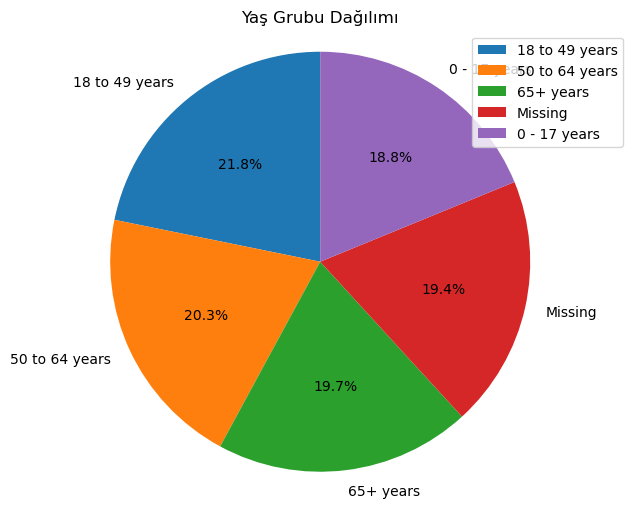

In [73]:
# Yaş grubu dağılımının görselleştirilmesi
age_group_counts = df['simulated_age_group'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yaş Grubu Dağılımı')
plt.legend()
plt.show()

In [72]:
# Hasta olan veri seti dağılımının görselleştirilmesi
sick_data = df[df['symptom_status'] == 'Symptomatic']
sick_state_counts = sick_data['age_group'].value_counts().reset_index()

fig = px.bar(sick_state_counts, x='index', y='age_group', animation_frame=sick_state_counts.index,
             labels={'index': 'Yaş Grubu', 'age_group': 'Sayı'}, title='Hasta Olan Veri Seti - Yaş Grubu Dağılımı')
fig.update_layout(xaxis={'type': 'category'})
fig.show()

In [71]:
df['case_month'] = pd.to_datetime(df['case_month'])
daily_cases = df.groupby('case_month').size().reset_index(name='case_count')

fig = px.line(daily_cases, x='case_month', y='case_count', title='COVID-19 Günlük Vaka Sayısı')
fig.update_layout(xaxis=dict(title='Tarih'), yaxis=dict(title='Günlük Vaka Sayısı'))
fig.show()